(5000, 9)
Class counts:
 Outcome
1    3320
0    1680
Name: count, dtype: int64
Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5635 - loss: 0.9305 - val_accuracy: 0.6425 - val_loss: 0.8301
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6124 - loss: 0.8458 - val_accuracy: 0.6500 - val_loss: 0.7939
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6436 - loss: 0.7886 - val_accuracy: 0.6500 - val_loss: 0.7665
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6611 - loss: 0.7585 - val_accuracy: 0.6500 - val_loss: 0.7434
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6598 - loss: 0.7399 - val_accuracy: 0.6500 - val_loss: 0.7255
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6596 - loss: 0.7194 - val_accuracy: 0.6500 - val_loss: 0.7100
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6733 - loss: 0.6978 - val_accuracy: 0.6500 - val_loss: 0.6979
Epoch 8/100
100/10

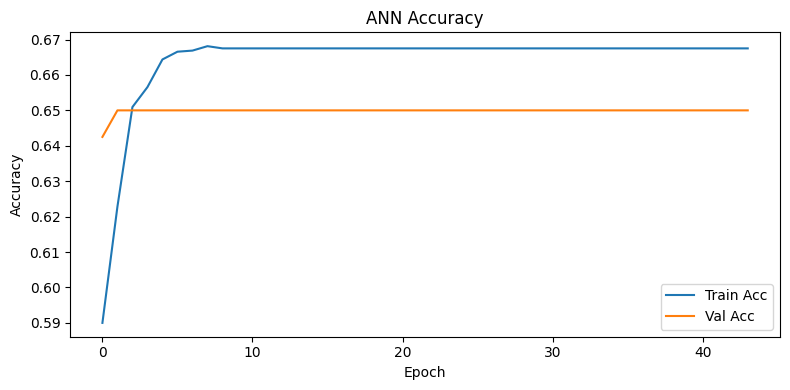

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[ANN] Accuracy:  0.6640
[ANN] Precision: 0.6640
[ANN] Recall:    1.0000
[ANN] ROC-AUC:   0.4979

[ANN] Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


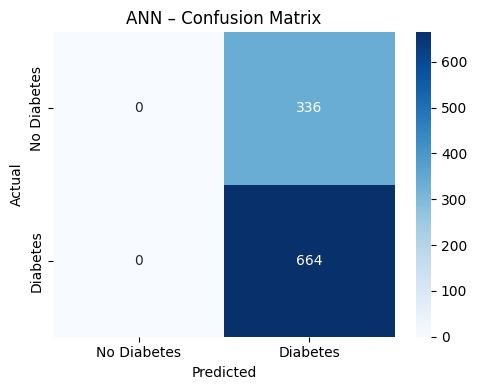

[LOGREG] Accuracy:  0.6640
[LOGREG] Precision: 0.6640
[LOGREG] Recall:    1.0000
[LOGREG] ROC-AUC:   0.5120

[LOGREG] Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       336
           1       0.66      1.00      0.80       664

    accuracy                           0.66      1000
   macro avg       0.33      0.50      0.40      1000
weighted avg       0.44      0.66      0.53      1000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


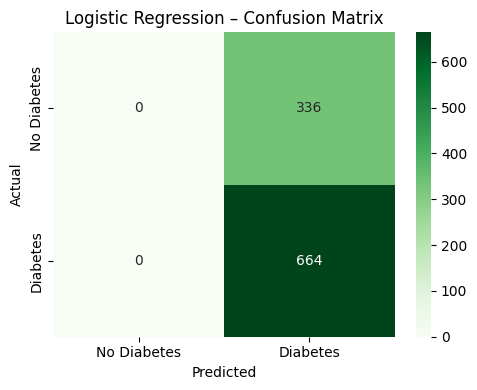


Comparison:
                  Model  Accuracy  Precision  Recall   ROC-AUC
0                  ANN     0.664      0.664     1.0  0.497896
1  Logistic Regression     0.664      0.664     1.0  0.511990


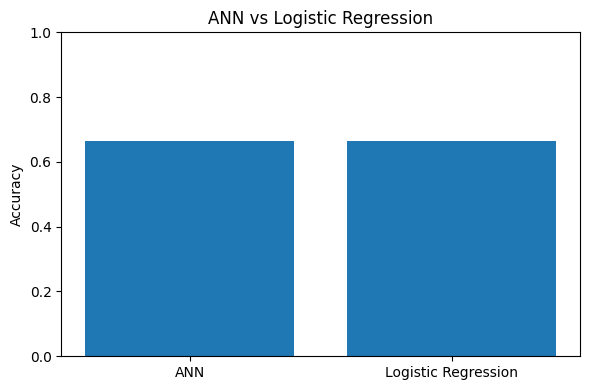

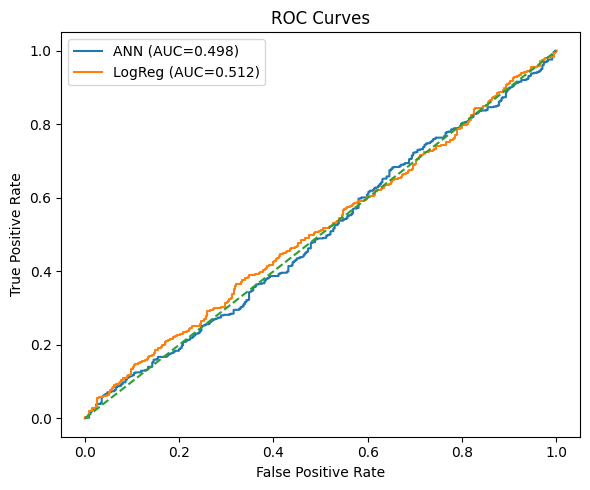

In [2]:
# 1) Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    classification_report, confusion_matrix, roc_auc_score, roc_curve
)
from sklearn.linear_model import LogisticRegression

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

# 2) Load dataset
df = pd.read_csv("Diabetes_ANN.csv")
print(df.shape)
df.head()

# Class counts
print("Class counts:\n", df['Outcome'].value_counts())

# 3) Features/target
X = df.drop(columns=['Outcome'])
y = df['Outcome']

# 4) Train/Test split + scale (same split used for both models)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

# 5) Build ANN
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(8, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# 6) Train ANN
history = model.fit(
    X_train_scaled, y_train,
    epochs=100, batch_size=32,
    validation_split=0.20,
    callbacks=[early_stop],
    verbose=1
)

# 7) Plot training curves
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('ANN Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend()
plt.tight_layout(); plt.show()

# 8) ANN evaluation
y_pred_prob_ann = model.predict(X_test_scaled)
y_pred_ann = (y_pred_prob_ann > 0.5).astype('int32').ravel()

acc_ann  = accuracy_score(y_test, y_pred_ann)
prec_ann = precision_score(y_test, y_pred_ann)
rec_ann  = recall_score(y_test, y_pred_ann)
auc_ann  = roc_auc_score(y_test, y_pred_prob_ann)

print(f"[ANN] Accuracy:  {acc_ann:.4f}")
print(f"[ANN] Precision: {prec_ann:.4f}")
print(f"[ANN] Recall:    {rec_ann:.4f}")
print(f"[ANN] ROC-AUC:   {auc_ann:.4f}")
print("\n[ANN] Classification Report:\n", classification_report(y_test, y_pred_ann))

cm_ann = confusion_matrix(y_test, y_pred_ann)
plt.figure(figsize=(5,4))
sns.heatmap(cm_ann, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('ANN – Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

# 9) Logistic Regression (baseline) on same split/scaling
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_scaled, y_train)

y_pred_log = logreg.predict(X_test_scaled)
y_proba_log = logreg.predict_proba(X_test_scaled)[:, 1]

acc_log  = accuracy_score(y_test, y_pred_log)
prec_log = precision_score(y_test, y_pred_log)
rec_log  = recall_score(y_test, y_pred_log)
auc_log  = roc_auc_score(y_test, y_proba_log)

print(f"[LOGREG] Accuracy:  {acc_log:.4f}")
print(f"[LOGREG] Precision: {prec_log:.4f}")
print(f"[LOGREG] Recall:    {rec_log:.4f}")
print(f"[LOGREG] ROC-AUC:   {auc_log:.4f}")
print("\n[LOGREG] Classification Report:\n", classification_report(y_test, y_pred_log))

cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Diabetes','Diabetes'],
            yticklabels=['No Diabetes','Diabetes'])
plt.title('Logistic Regression – Confusion Matrix')
plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.tight_layout(); plt.show()

# 10) Side-by-side comparison + bar plot
compare = pd.DataFrame({
    'Model': ['ANN','Logistic Regression'],
    'Accuracy': [acc_ann, acc_log],
    'Precision': [prec_ann, prec_log],
    'Recall': [rec_ann, rec_log],
    'ROC-AUC': [auc_ann, auc_log]
})
print("\nComparison:\n", compare)

plt.figure(figsize=(6,4))
plt.bar(compare['Model'], compare['Accuracy'])
plt.ylim(0,1); plt.ylabel('Accuracy'); plt.title('ANN vs Logistic Regression')
plt.tight_layout(); plt.show()

# 11) (Optional) ROC curves
fpr_ann, tpr_ann, _ = roc_curve(y_test, y_pred_prob_ann)
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_log)

plt.figure(figsize=(6,5))
plt.plot(fpr_ann, tpr_ann, label=f'ANN (AUC={auc_ann:.3f})')
plt.plot(fpr_log, tpr_log, label=f'LogReg (AUC={auc_log:.3f})')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Curves'); plt.legend(); plt.tight_layout(); plt.show()
